<a href="https://colab.research.google.com/github/siabreu/data_science/blob/main/Analisando_os_Dados_do_Airbnb_(Lisboa_Portugual).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Lisboa em Portugual*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

O Airbnd é uma plataforma de serviços de compartilhamento e oferta que conecta pessoas em busca de acomodações a pessoas do mundo inteiro que oferecem suas casas com valores  mais em conta em qualquer lugar do mundo.

É possível alugar um apartamento/casa inteiro, apenas um cômodo ou até compartilhar com outros hospedes.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, irei analisar os dados referentes à cidade Lisboa, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Para realizar a análise exploratória foram utilizados os dados do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Mais especificamente, os dados do seguinte dataset:
* `listings.csv` - *Summary information and metrics for listings in Lisbon (good for visualisations).*

In [7]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/portugal/lisbon/lisbon/2020-12-20/visualisations/listings.csv")

## Análise dos Dados

O objetivo desta análise inicial dos dados é ter uma visão geral e entendimento do problema. É importante saber como os dados estão estruturados no dataset por meio de um dicionário de variáveis.

**Dicionário de variáveis**

* `id` - número para identificar o imóvel
* `name` - nome do imóvel anunciado 
* `host_id` - número para identificar o anfitrião (proprietário) do imóvel
* `host_name` - nome do anfitrião 
* `neighbourhood_group` - coluna sem valor válido (NaN) 
* `neighbourhood` - nome do bairro 
* `latitude` - coordenada da latitude do imóvel 
* `longitude` - coordenada da longitude do imóvel 
* `room_type` - informa o tipo de quarto que é oferecido 
* `price` - preço para alugar o imóvel 
* `minimum_nights` - quantidade mínima de noites para reservar 
* `number_of_reviews` - número de reviews que a propriedade possui 
* `last_review` - data do último review 
* `reviews_per_month` - quantidade de reviews por mês 
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião 
* `availability_365` - número de dias de disponibilidade dentro de 365 dias 

Antes de iniciar qualquer análise, vamos ter uma idéia de como *dataset* está organizado, analisando as 5 primeiras entradas.

In [9]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,79,3,26,2020-01-03,0.34,1,355
1,25659,Heart of Alfama - Coeur d'Alfama - Lisbon Center,107347,Ellie,Lisboa,Santa Maria Maior,38.71167,-9.12696,Entire home/apt,50,3,113,2019-12-08,1.39,1,363
2,29248,Apartamento Alfama com vista para o rio!,125768,Bárbara,Lisboa,Santa Maria Maior,38.71272,-9.12628,Entire home/apt,42,3,324,2020-11-01,2.67,1,348
3,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.71156,-9.12987,Entire home/apt,36,2,260,2020-12-14,2.49,2,327
4,29915,Modern and Cool Apartment in Lisboa,128890,Sara,Lisboa,Avenidas Novas,38.74712,-9.15286,Entire home/apt,48,5,39,2020-12-17,0.31,1,270


### **Q1. Quantos atributos (variáveis) e quantas entradas o conjunto de dados possui? Quais os tipos das variáveis?**

Nesta etapa vamos identificar a quantidade de entradas e os tipos de dados de cada coluna do dataset.

A versão do dataset desta análise trata-se de uma versão "resumida". Há uma versão mais detalhada para se ter uma análise mais completa e complexa usando o arquivo [`listings.csv.gz`](http://data.insideairbnb.com/portugal/lisbon/lisbon/2020-12-20/data/listings.csv.gz).

In [10]:
# identificar o volume de dados do DataFrame
print('Entradas:\t {}'.format(df.shape[0]))
print('Variáveis:\t {}\n'.format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 20141
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

É importante perceber a existência de valores ausentes e sua quantidade, dentro do dataset, para se ter uma análise mais precisa. É preciso saber ser os valore nulos são significativos comparados ao total de entradas.

* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase 20% das linhas.
* As variáveis `name` e `host_name` tem aproximadamente 0,01% dos valores nulos.


In [11]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.174470
last_review                       0.174470
name                              0.000496
host_name                         0.000050
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para idenficitar a distribuição das variáveis, irei plotar o histograma.

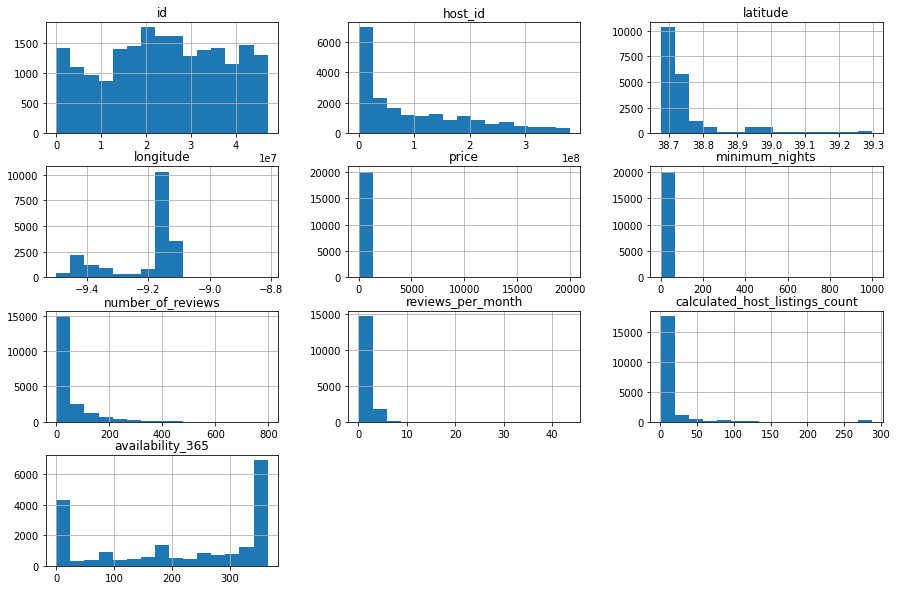

In [22]:
# plotar o histograma das variáveis numéricas

df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Analisando os histogramas é possível ver indícios da presença de *outliers*, por exemplo, variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, vamos utilizar duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [34]:
# ver o resumo estatístico das variáveis numéricas

df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,20141.000000,20141.000000,20141.000000,16627.000000,20141.000000,20141.000000
mean,103.149695,3.703689,43.260911,1.227901,13.577826,214.359913
std,332.983121,18.163081,68.297796,1.328587,37.528400,143.068871
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,45.000000,1.000000,2.000000,0.260000,1.000000,76.000000
50%,66.000000,2.000000,13.000000,0.780000,3.000000,262.000000
75%,100.000000,3.000000,56.000000,1.830000,10.000000,356.000000
max,19988.000000,1000.000000,797.000000,43.640000,288.000000,365.000000


Ao visualizar o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 100, porém seu valor máximo é 19988.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights



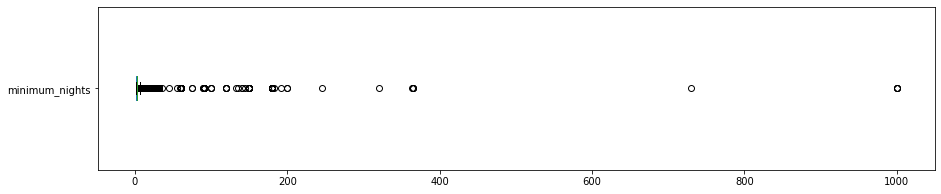

minimum_nights => valores acima de 30: 
102 entradas
0.5064%


In [45]:
# minimun_nights

df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights => valores acima de 30: ")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price



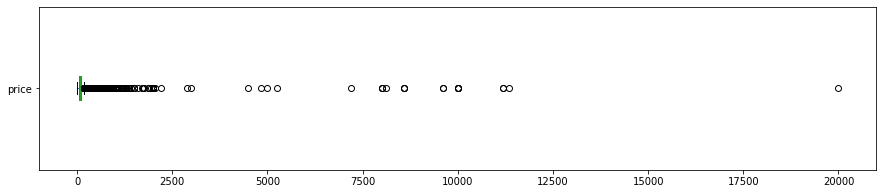


price => valores acima de 1500
43 entradas
0.2135%


In [46]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice => valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.


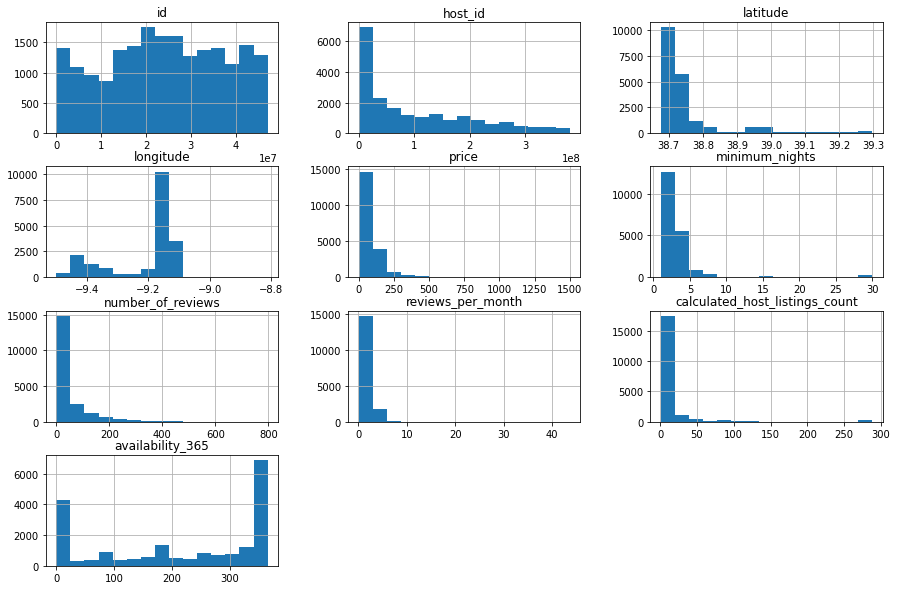

In [47]:
# remover os outliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15, 10));

### **Q5. Qual a média dos preços de aluguel?**

É possível identificar uma média dos preços do aluguel dos imóveis.

In [48]:
# ver a média da coluna price

print('O valor médio pago por um aluguel em Portugual é $ {:.4f}'.format(df_clean.price.mean()))

O valor médio pago por um aluguel em Portugual é $ 91.5197


### **Q6. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`


In [50]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
    
display(corr)
# mostrar a matriz de correlação


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.019342,-0.118264,-0.138298,0.006697,0.018659
minimum_nights,-0.019342,1.000000,-0.049671,-0.085666,-0.044283,-0.024358
number_of_reviews,-0.118264,-0.049671,1.000000,0.794718,-0.087034,-0.017576
reviews_per_month,-0.138298,-0.085666,0.794718,1.000000,-0.091431,-0.021245
calculated_host_listings_count,0.006697,-0.044283,-0.087034,-0.091431,1.000000,0.044651
availability_365,0.018659,-0.024358,-0.017576,-0.021245,0.044651,1.000000


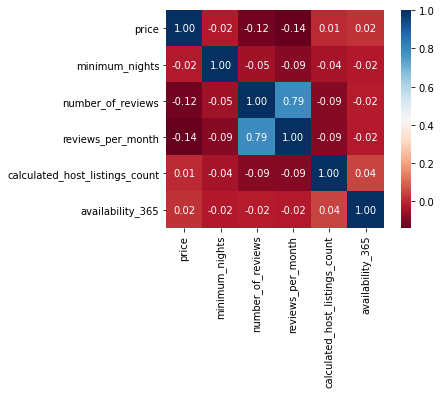

In [52]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

Pela variável `room_type` é possível identificar o tipo de locação que é anunciada no Airbnb. Existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos usar o método `value_counts()` para apresentar a quantidade de ocorrências de cada tipo de aluguel.


In [53]:
# mostrar a quantidade de cada tipo de imóvel disponível

df_clean.room_type.value_counts()

Entire home/apt    14899
Private room        4331
Hotel room           420
Shared room          346
Name: room_type, dtype: int64

In [54]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.745099
Private room       0.216593
Hotel room         0.021004
Shared room        0.017303
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara de Lisboa?**

Para comparar os bairros (`neighbourhoods`) a partir do preço de locação, vamos usar a função `groupby()`.

In [55]:
# ver preços por bairros, na média

df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

# 

neighbourhood
Azambuja                                    317.500000
Freiria                                     290.000000
Cardosas                                    280.000000
Ota                                         249.000000
Vermelha                                    242.500000
Alguber                                     220.000000
Alhandra, So Joo dos Montes e Calhandriz    218.888889
Aveiras de Baixo                            213.000000
Vale do Paraso                              201.000000
Bucelas                                     179.222222
Name: price, dtype: float64

In [63]:
print(df_clean[df_clean.neighbourhood == "Azambuja"].shape)

df_clean[df_clean.neighbourhood == "Azambuja"]


(2, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3260,8399727,Casa do Alfaro,44253397,Rodrigo,Azambuja,Azambuja,39.09760,-8.90530,Entire home/apt,600,3,3,2017-10-07,0.06,1,269
16360,38071293,Casa da Rainha - Azambuja,288897396,Inês,Azambuja,Azambuja,39.06735,-8.86967,Private room,35,1,0,NaN,NaN,1,179


Vamos plotar cada imóvel pela sua latitude e longitude considerando `x=longitude` e `y=latitude`.

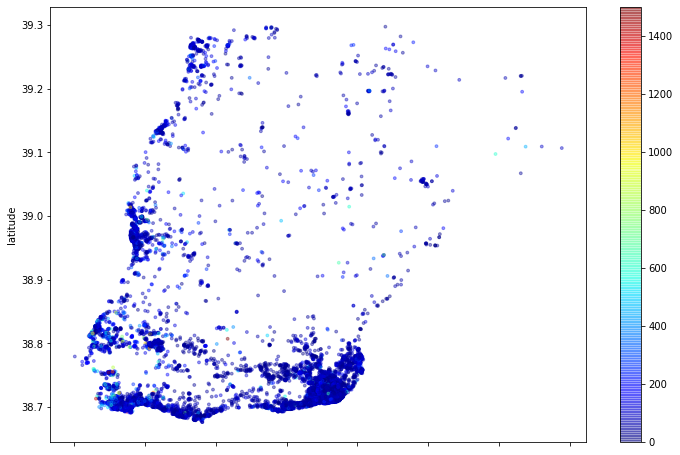

In [64]:
# plotar os imóveis pela latitude-longitude

df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, 
              c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12, 8));

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [74]:
# ver a média da coluna minimum_nights

print('A média do mínimo de noites para aluguel em Lisboa {:.1f} noites.'.format(df_clean.minimum_nights.mean()))

A média do mínimo de noites para aluguel em Lisboa 2.9 noites.


## Conclusões

Por ser um dataset na versão resumida a quantidade de dados disponíveis não é tão grande. Mas é suficiente para se ter uma abordagem inical. 

Apesar de se tratar de uma análise superficial na base de dados do Airbnd é possível verificar a existencia de *outliers* em algumas das variáveis.

É possivel notar há poucos imóveis disponíveis algumas localidades `(Q8)` o que pode distorcer as informações estatísticas de algumas variáveis.